In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
from pandas import DataFrame

import matplotlib.patches as mpatches
import matplotlib.lines as mlines


In [18]:
dados=pd.read_excel('data_mean.xlsx')
dados.head()

,Gleba,Ponto,Latitude,Longitude,Ano,NDVI,EVI,PH,MO,P,...,Ca,Mg,CTC,V%,S,B,Cu,Fe,Mn,Zn
0,1,1,7959922.0,626381.0,2009,0.6952,0.4242,5.2,27,32,...,20,8,68.0,44.1,9,0.20,2.8,17,10.1,0.5
1,1,1,7959922.0,626381.0,2010,0.6779,0.4243,5.4,34,23,...,31,11,75.0,61.1,5,0.14,3.5,22,18.6,0.8
2,1,1,7959922.0,626381.0,2011,0.6417,0.4003,5.0,34,34,...,35,12,90.0,54.4,24,0.20,2.8,20,11.8,0.8
3,1,1,7959922.0,626381.0,2012,0.6750,0.4489,5.1,32,20,...,31,12,83.0,52.9,31,0.19,2.8,18,14.2,1.0
4,1,1,7959922.0,626381.0,2013,0.6727,0.4227,5.1,32,20,...,31,12,83.0,52.9,31,0.19,2.8,18,14.2,1.0


In [19]:
dados.to_excel('data-trat.xlsx')

In [20]:
data = dados[['NDVI','EVI','PH', 'MO', 'P', 'K', 'Ca', 'Mg', 'CTC', 'V%', 'S', 'B', 'Cu', 'Fe', 'Mn', 'Zn']]
data.head()

,NDVI,EVI,PH,MO,P,K,Ca,Mg,CTC,V%,S,B,Cu,Fe,Mn,Zn
0,0.6952,0.4242,5.2,27,32,1.4,20,8,68.0,44.1,9,0.20,2.8,17,10.1,0.5
1,0.6779,0.4243,5.4,34,23,2.8,31,11,75.0,61.1,5,0.14,3.5,22,18.6,0.8
2,0.6417,0.4003,5.0,34,34,1.8,35,12,90.0,54.4,24,0.20,2.8,20,11.8,0.8
3,0.6750,0.4489,5.1,32,20,1.3,31,12,83.0,52.9,31,0.19,2.8,18,14.2,1.0
4,0.6727,0.4227,5.1,32,20,1.3,31,12,83.0,52.9,31,0.19,2.8,18,14.2,1.0


In [21]:
descritiva_geral=data.describe()
descritiva_geral

,NDVI,EVI,PH,MO,P,K,Ca,Mg,CTC,V%,S,B,Cu,Fe,Mn,Zn
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,0.611818,0.390372,5.157609,31.605072,21.543478,1.009903,26.659420,8.818841,75.848188,46.154952,38.638889,0.216039,3.131280,17.141304,9.139372,0.607246
std,0.087433,0.070381,0.278148,4.551181,21.182784,0.518554,13.893617,3.756627,14.969393,13.541551,25.987185,0.063758,1.421488,6.207854,6.691764,0.873136
min,0.229100,0.155700,4.500000,21.000000,2.000000,0.200000,5.000000,2.000000,5.300000,11.400000,3.000000,0.070000,1.200000,6.000000,1.500000,0.100000
25%,0.567075,0.346025,5.000000,28.000000,11.000000,0.700000,17.000000,6.000000,66.000000,36.300000,19.000000,0.170000,2.600000,13.000000,5.500000,0.300000
50%,0.626900,0.400600,5.100000,32.000000,18.000000,0.900000,26.000000,8.000000,75.000000,46.150000,33.000000,0.210000,3.000000,15.000000,7.500000,0.500000
75%,0.675950,0.438800,5.300000,35.000000,28.000000,1.200000,35.000000,11.000000,85.000000,56.800000,52.000000,0.250000,3.500000,20.000000,11.100000,0.700000
max,0.793200,0.575100,6.800000,45.000000,311.000000,7.400000,206.000000,25.000000,257.000000,89.500000,142.000000,0.700000,36.000000,62.000000,65.500000,20.500000


In [22]:
# Descritiva de todas as variáveis no geral
descritiva_geral.to_excel('descritiva_geral.xlsx')

In [23]:
# Correlação entre todas as variáveis
corel_sp=data.corr(method='spearman')
corel_sp

,NDVI,EVI,PH,MO,P,K,Ca,Mg,CTC,V%,S,B,Cu,Fe,Mn,Zn
NDVI,1.000000,0.821826,0.129337,0.011167,0.189544,0.119888,0.150702,0.101042,0.048775,0.170529,0.164363,0.026391,0.086039,0.127309,0.053590,0.050595
EVI,0.821826,1.000000,0.056892,-0.024322,0.213841,0.031598,0.067491,0.017088,-0.021264,0.081783,0.110821,-0.012154,0.026770,0.094825,-0.016082,0.007306
PH,0.129337,0.056892,1.000000,0.203621,0.356483,0.272050,0.666440,0.736803,0.398559,0.785939,-0.055566,-0.053973,0.252457,0.197814,0.168077,0.178523
MO,0.011167,-0.024322,0.203621,1.000000,-0.016766,0.024781,0.489249,0.269398,0.621857,0.307562,0.289260,0.282226,0.106233,0.048139,-0.200751,0.128770
P,0.189544,0.213841,0.356483,-0.016766,1.000000,0.178875,0.277627,0.323593,0.133563,0.349191,-0.065008,-0.133211,0.279713,0.411746,0.270374,0.424764
K,0.119888,0.031598,0.272050,0.024781,0.178875,1.000000,0.311551,0.376022,0.275463,0.381586,0.004585,0.128428,0.084634,0.306930,0.371655,0.231330
Ca,0.150702,0.067491,0.666440,0.489249,0.277627,0.311551,1.000000,0.837869,0.877927,0.929928,0.421741,0.408373,0.069019,0.225500,0.246971,0.354974
Mg,0.101042,0.017088,0.736803,0.269398,0.323593,0.376022,0.837869,1.000000,0.701294,0.894704,0.167040,0.213631,0.170086,0.232629,0.338451,0.380387
CTC,0.048775,-0.021264,0.398559,0.621857,0.133563,0.275463,0.877927,0.701294,1.000000,0.704186,0.510801,0.527976,-0.047701,0.117993,0.104156,0.272192
V%,0.170529,0.081783,0.785939,0.307562,0.349191,0.381586,0.929928,0.894704,0.704186,1.000000,0.239318,0.233842,0.169694,0.299111,0.358284,0.395056


In [24]:
data.to_excel('correlacao_sp.xlsx')

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

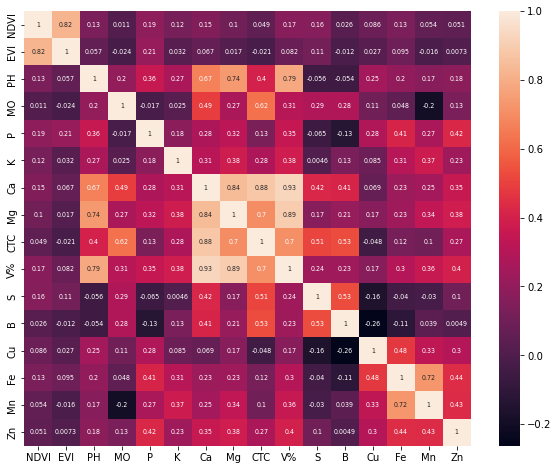

In [25]:
# Gráfico de correlação "heatmap"

#sns.heatmap(data.corr(),annot=True)

plt.figure() 
plt.figure(figsize=(10, 8))
sns.heatmap(corel_sp, annot=True, annot_kws={"size": 25 / np.sqrt(len(corel_sp))})


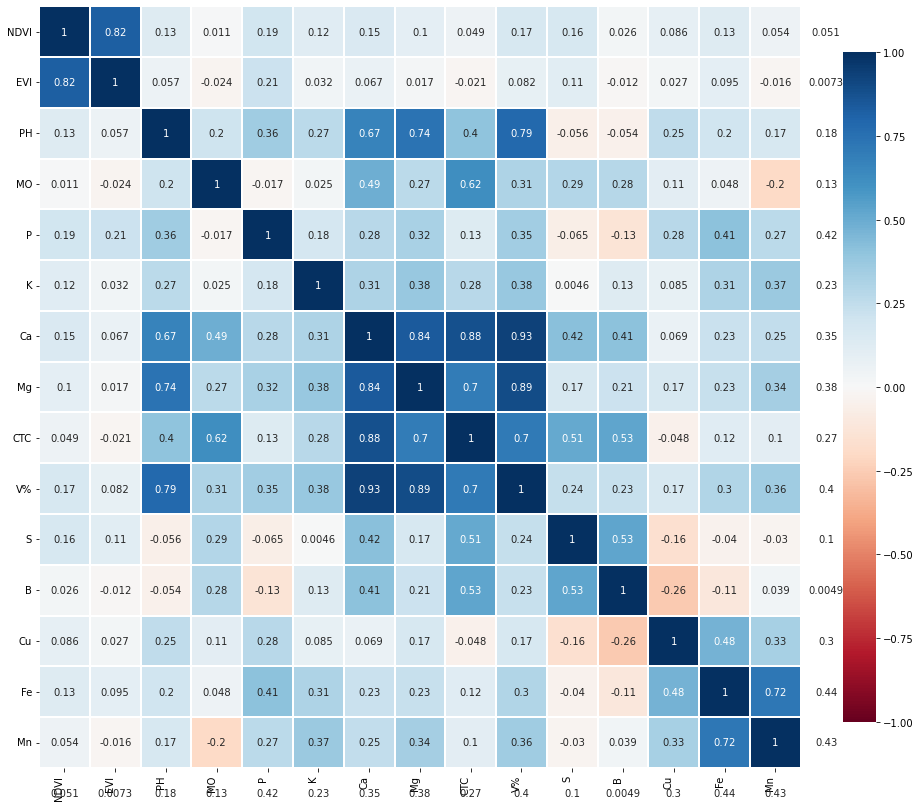

In [26]:
plt.figure(figsize=(15,15))# fig size é igual o tamanho das variáreis
ax = sns.heatmap(
    corel_sp, 
    vmin=-1, vmax=1, center=0,
    cmap='RdBu',
    square=True, annot=True,fmt='.2g',robust=True,
    linewidths=2,
    cbar_kws={'fraction' : 0.04}
     
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    

);
ax.set_ylim([15,0])
ax.set_xlim([0,15])
plt.yticks(rotation=0, fontsize=10)
plt.xticks(fontsize=10);
plt.savefig('correlacao_sp.png', transparent = False,bbox_inches='tight', dpi=1000)

#cmap='RdBu',

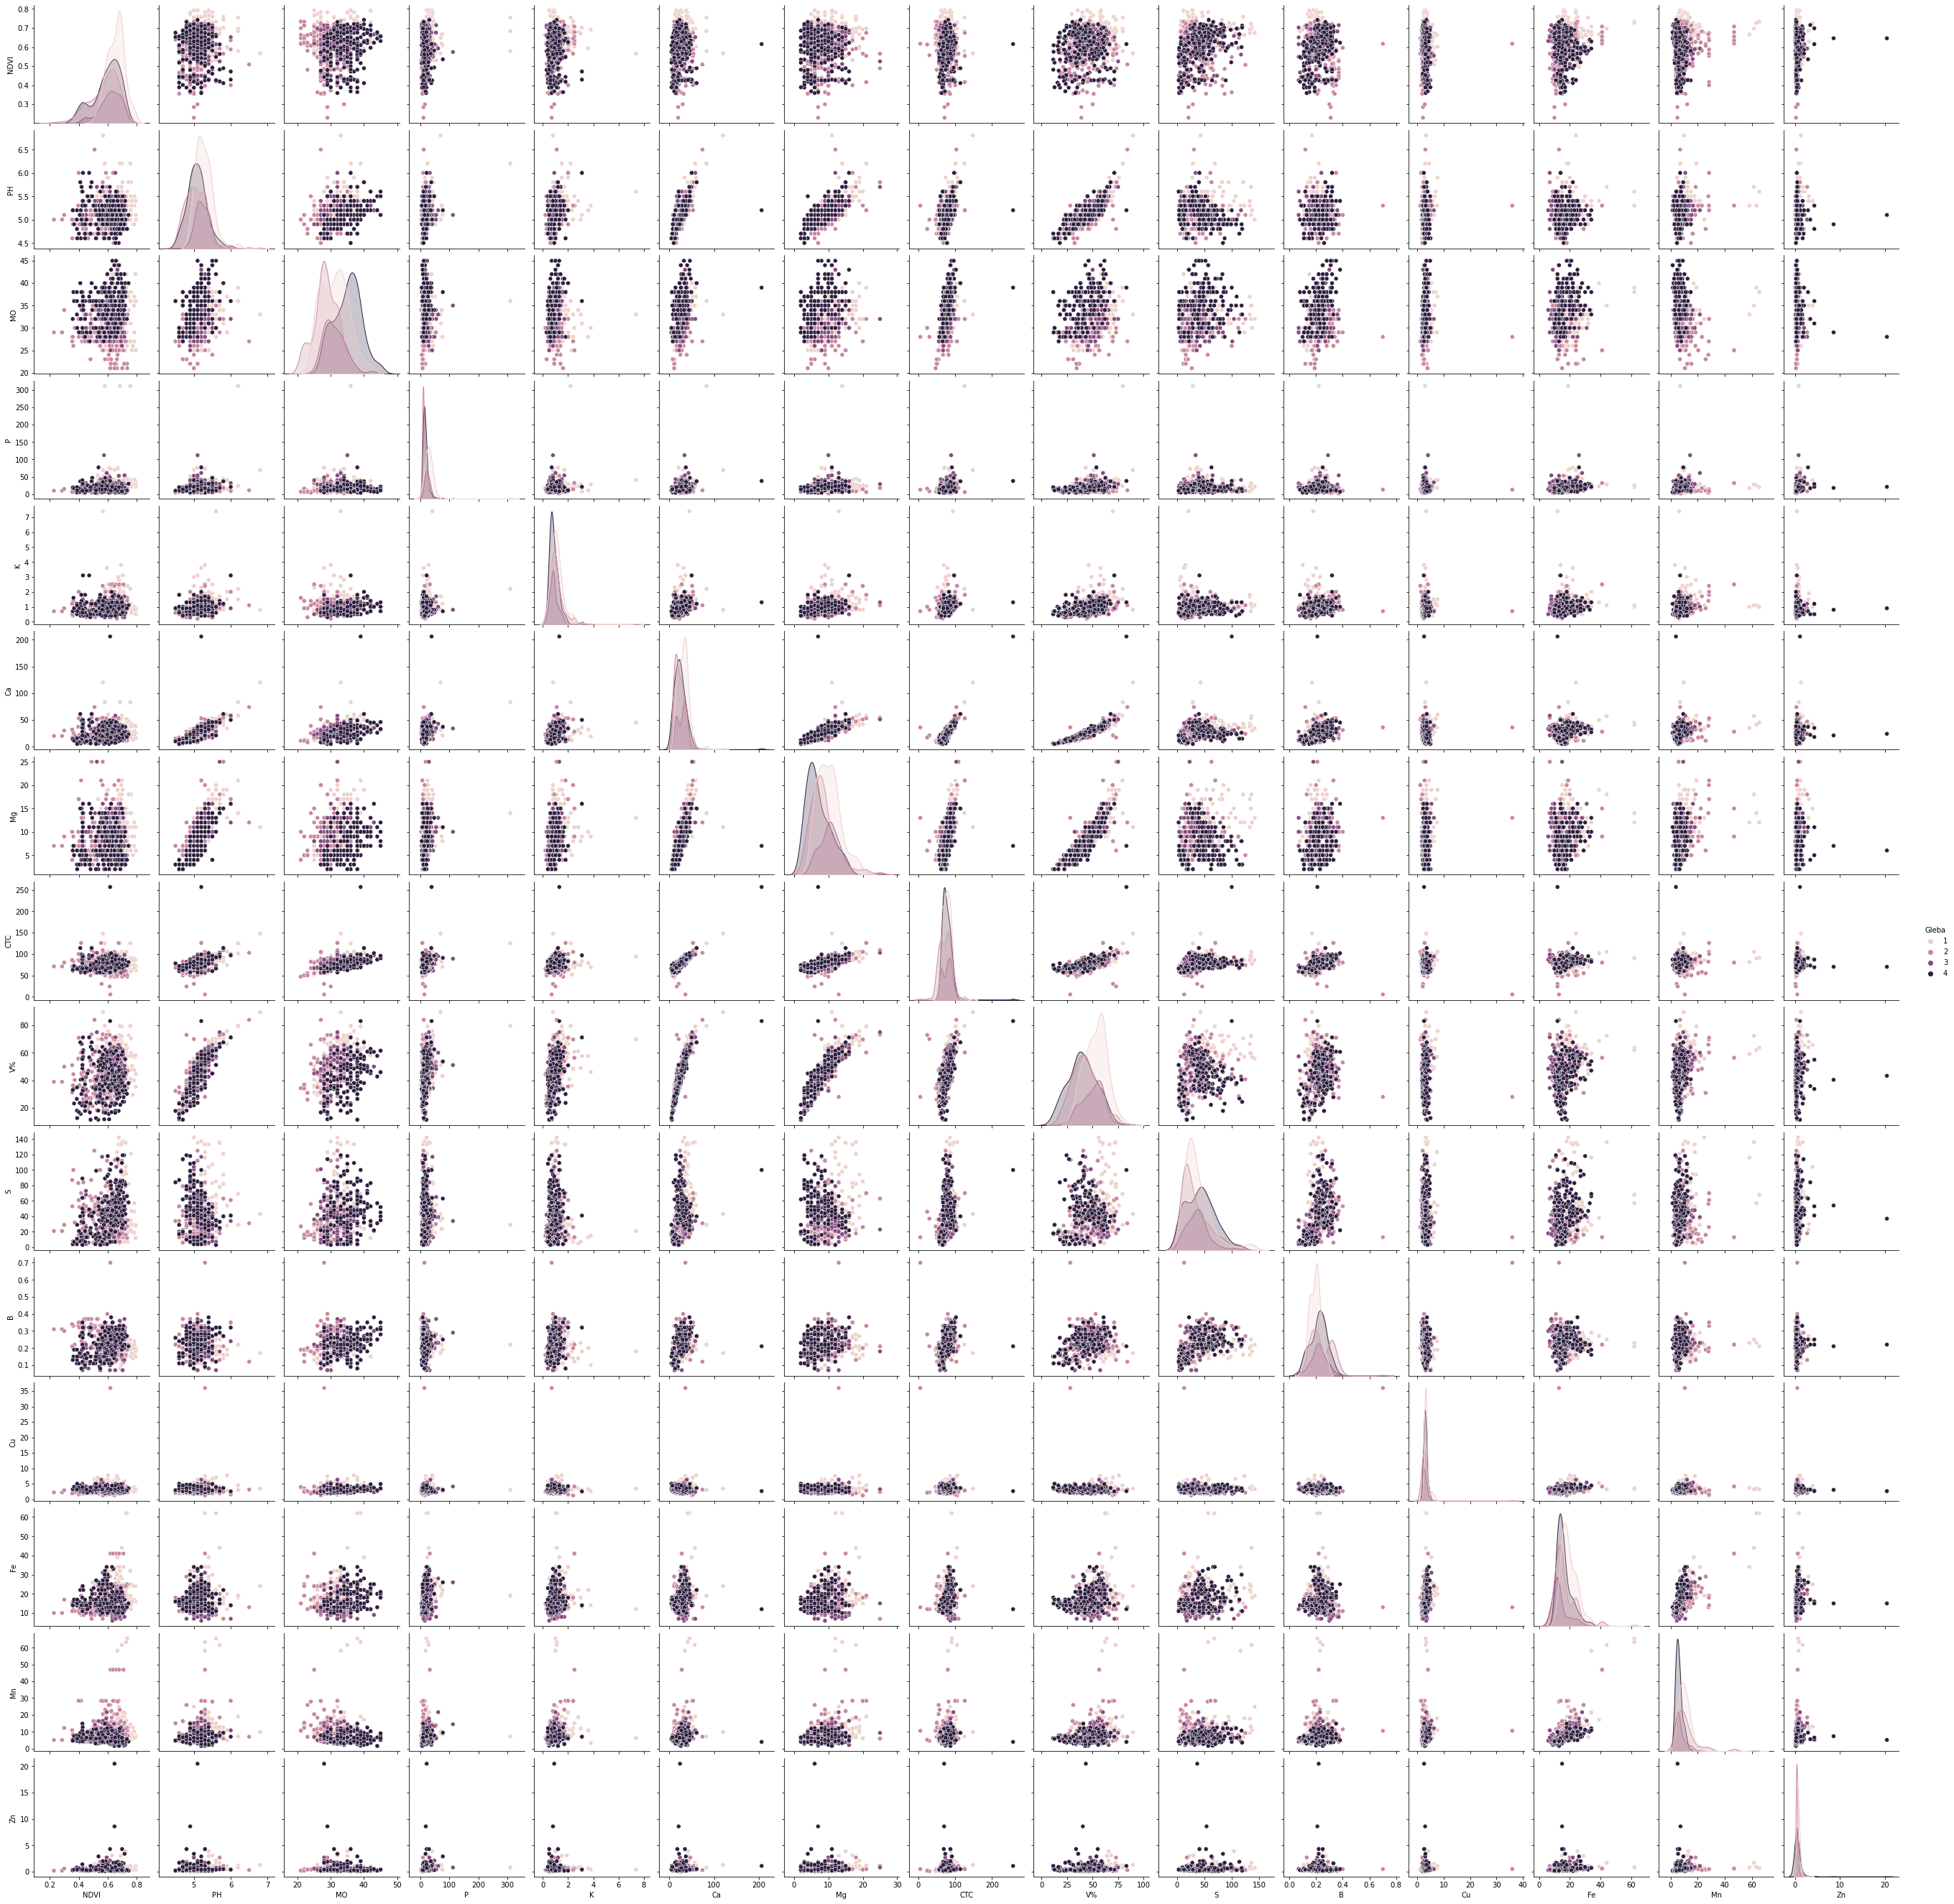

In [28]:
# Pairplot

sns.pairplot(dados[['Gleba', 'NDVI','PH', 'MO', 'P',
                   'K', 'Ca','Mg', 'CTC', 'V%', 'S',
                   'B', 'Cu', 'Fe', 'Mn', 'Zn']], hue='Gleba')
#sns.pairplot(data, hue="Gleba")